# <span style="color:#336699">CAP349 - Banco de Dados Geográficos <img src="./logo_inpe.png" style="margin-left: 50px; height: 100px;" align="right"></span>
<hr style="border:2px solid #0077b9;">

# <span style="color:#336699">1ª Lista de Excecícios</span>

Professores:
- Dr. Gilberto Queiroz 
- **Dra. Lúbia Vinhas**
- Dra. Karine Ferreira

Discente:
- Adriano Pereira Almeida
<p style="text-align: right; font-style: italic; ">Programa de Pós Graduação em Computação Aplicada</p>

# Descição
<hr style="border:1px solid #0077b9;">


Esse documento é referente a atividade da disciplina CAP349 (Banco de dados geográficos), proposta pel Dra. Lúbia Vinhas

# 1. Exercício
Uma pessoa adquiriu uma imagem de sensoriamento remoto com as seguintes características:
 - 96 linhas, 90 colunas; resolução horizontal e vertical de 30 metros
 - coordenada do centro do pixel do canto superior esquerdo: (357345.0, 7369848.0), dadas em no sistema de referência espacial com SRID 29193 dado pela autoridade EPSG.
 
A pessoa fez um levantamento de campo e voltou com os seguintes pontos de GPS, medidos em Latitude e Longitude sobre Datum SAD69, unidades Graus Decimais:


**Longitude** | **Latitude**
------------- |--------------
-46.38316591 | -23.77018768
-46.36559748 | -23.77315973
-46.36515407 | -23.78565826
-46.37767412 | -23.79364209
-46.38888124 | -23.78597452
-46.38021129 | -23.78024496
-46.39070815 | -23.77786303
-46.38797965 | -23.77313614
-46.38316591 | -23.77018768
|<img width=100/>|<img width=200/>|

Pergunta-se:

### 1) Qual a área (em metros quadrados) da região coberta pela imagem?
    

#### Dependências

Para a resolução desta lista de exercício forma utilizadas algumas bibliotecas de manipulação de dados geográficos, são elas:

- [pyproj](https://pyproj4.github.io/pyproj/stable/installation.html) - Biblioteca utilizada para fazer transformações dos sistemas de projeções cartofráficas.
- [shapely](https://shapely.readthedocs.io) - Biblioteca utilizada para fazer operações e manipulação de objetos primitivos geométricos.
- [geopandas](http://geopandas.org) - Biblioteca para manipulação de dados geográficos.
- [matplotlib](https://matplotlib.org/) - Biblioteca para visualização de gráficos.
- [folium](https://python-visualization.github.io/folium/) - Biblioteca para visualização de mapas.

In [23]:
from pyproj import Proj, transform
from shapely.geometry import Polygon, Point
import folium
import matplotlib.pyplot as plt
import geopandas as gpd

Definição dos sistemas de projeção cartográficas que serão utilizados:

In [24]:
EPSG1 = Proj(init='epsg:29193')
EPSG2 = Proj(init='epsg:4618')
POLY = {'init': 'epsg:4618'}

Sabendo que a área capturada pelo satélite tem as seguintes dimensões:

<table width=300>
    <tr align="center">
        <th colspan=2>
           <center>Dimensões da área da imagem</center>
        </th>
    </tr>
    <tr>
        <td align="center">Linhas</td>
        <td align="center">96</td>
    </tr>
    <tr>
        <td align="center">Colunas</td>
        <td align="center">90</td>
    </tr>
    <tr>
        <td align="center">Altura da Célula</td>
        <td align="center">30 Metros</td>
    </tr>
    <tr>
        <td align="center">Largura da Célula</td>
        <td align="center">30 Metros</td>
    </tr>
</table>

Pode-se observar que iniciamente não é necessário aplicar as projeções cartográficas para obter a sua área em metros quadrados. Sendo assim, basta descobrir as coordenadas dos pontos dos cantos da matriz. Utilizando coordenadas genéricas, iniciando em (0, 0), os pontos podem ser obtidos da seguinte maneira:   

$
p1 = (x=0, y=0)
$

$
p2 = (x=30*90, y=0)
$

$
p3 = (x=30*90, y=30*96)
$

$
p4 = (x=0, y=30*96)
$

Para calcular a área basta:

$$
Area = \left | \frac{(px1*py2 - py1*px2)+(px2*py3 - py2*px3) + (px3*py4 - py3*px4) + (px4*py1 - py4*px1) }{2} \right |
$$

$$
Area = \left | \frac{(0*0 - 0*2700)+(2700*2880 - 0*2700) + (2700*2880 - 2880*0) + (0*0 - 2880*0) }{2} \right |
$$

$$
Area = \left| \frac{15552000}{2} \right| = 7776000.0 m^2
$$

Aplicando os valores e fórmula acima em código em python temos:

In [25]:
def getArea(pts):
    qtd_pts = len(pts)
    sigma = 0
    for i in range(qtd_pts):
        cur, nex = (i%qtd_pts, (i+1)%qtd_pts)  
        sigma += pts[cur][0]*pts[nex][1]-pts[cur][1]*pts[nex][0]
        
    return abs(sigma/2)

pts = [(0, 0), (30*90, 0), (30*90, 30*96), (0, 30*96)]

print('A área total da imagem capturada pelo satélite é {} m²'.format(getArea(pts)))

A área total da imagem capturada pelo satélite é 7776000.0 m²


Aplicando o a mesma função usada anteriormente nas coordenadas originais da imagem, obtemos a mesma área, como mostrado a seguir:

In [26]:
rows, cols = (96, 90)

points_o = [(357345.0, 7369848.0)]
points_o.append (
    ((points_o[0][0]+30*90), points_o[0][1])
)
points_o.append (
    (points_o[1][0], (points_o[0][1]+30*96))
)
points_o.append (
    (points_o[0][0], points_o[2][1])
)
points_o
[print('X={}, Y={}'.format(p[0], p[1])) for p in points_o]
print('A área total da imagem capturada pelo satélite é {} m²'.format(getArea(points_o)))

X=357345.0, Y=7369848.0
X=360045.0, Y=7369848.0
X=360045.0, Y=7372728.0
X=357345.0, Y=7372728.0
A área total da imagem capturada pelo satélite é 7776000.0 m²


Afim de melhorar a visualização, as coordenadas da área de cobertura do satélite e as coordenadas dos pontos na tabela foram adicionadas em um mapa real. A primeira coisa a se fazer é trasnformar as coordenadas da área de cobertura do satélite para o mesmo sistema de coordenadas dos pontos da tabela. Para fazer isso foi utilizada a função $\textit{transform()}$ da biblioteca [pyproj](https://pyproj4.github.io/pyproj/stable/installation.html), passando o sistema de referência atual, o novo sistema de referência e os pontos a serem convertidos.

In [27]:
points_t = [
    transform(EPSG1, EPSG2, point[0], point[1]) 
    for point in points_o
]
[print('Longitude={}, Latitude={}'.format(p[0], p[1])) for p in points_t]
print('\nTransformação do sistema de referência EPSG29193 para EPSG4618')

Longitude=-46.40003999380805, Latitude=-23.776118828987528
Longitude=-46.37354772538318, Latitude=-23.776356788919532
Longitude=-46.3732747447417, Latitude=-23.750350598273975
Longitude=-46.39976175221029, Latitude=-23.75011292996263

Transformação do sistema de referência EPSG29193 para EPSG4618


Para adicionar no mapa a demarcação que representa a área de cobertura do satélite, é necessário transformar os pontos em um polígono. Para isso foram utilizadas as bibliotecas [shapely](https://shapely.readthedocs.io) e [geopandas](http://geopandas.org), como mostrado a seguir.

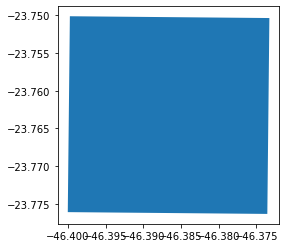

In [28]:
img_visible_satellite = gpd.GeoDataFrame(crs=POLY, geometry=[Polygon(points_t)])
plt.show(img_visible_satellite.plot())

Após isso, foi inserido o mapa com sua visualização sobre a área visível das coordenadas, e então adicionado o polígono representado a área de cobertura do satélite e os pontos da tablea, como mostrado a seguir:

In [29]:
# Criando objeto mapa
view = folium.Map (
    location=[-23.7661188000, -46.3800000000], 
    zoom_start=13.45
)

#Adicionando o polígono representando a área visível do satélite
folium.GeoJson (
    img_visible_satellite,
    style_function=lambda feature: {
        'color': '#FF00008A'
    }
).add_to(view)

#Pontos da tabela
points_c = [ 
    (-46.38316591, -23.77018768),
    (-46.36559748, -23.77315973),
    (-46.36515407, -23.78565826),
    (-46.37767412, -23.79364209),
    (-46.38888124, -23.78597452),
    (-46.38021129, -23.78024496),
    (-46.39070815, -23.77786303),
    (-46.38797965, -23.77313614),
    (-46.38316591, -23.77018768)
]

#Adicionando coordenadas da tabela no mapa
feature_group = folium.FeatureGroup("Points")
i = 1
for point in points_c:    
    feature_group.add_child(
        folium.Marker(
            location=point[::-1],
            popup='Ponto '+str(i)
        )
    )
    i+=1

view.add_child(feature_group)


view

### 2) Quais os pontos tem intersecção com a imagem? Ou seja, quais pontos poderiam ser localizados dentro da imagem?

Para verificar quais pontos da tabela estão dentro da imagem de visualização do satélite, foi utilizado o método $\textit{contains()}$ da biblioteca [geopandas](http://geopandas.org), que verifica se determinado objeto está dentro de outra figura.

In [30]:
i = 1
for point in points_c:
    p = Point(point)
    if img_visible_satellite.contains(p)[0]:
        print('O Ponto {} da tabela (Lat: {}, Lon: {}) está localizado dentro da imagem.'.format(i, point[0], point[1]))
    i+=1

O Ponto 1 da tabela (Lat: -46.38316591, Lon: -23.77018768) está localizado dentro da imagem.
O Ponto 8 da tabela (Lat: -46.38797965, Lon: -23.77313614) está localizado dentro da imagem.
O Ponto 9 da tabela (Lat: -46.38316591, Lon: -23.77018768) está localizado dentro da imagem.


### 3) Se os pontos, na ordem apresentada, tiverem sido coletados ao longo das bordas de uma fazenda, qual a área (em metros quadrados) da fazenda?

Transformando coordenadas da tabela em polígono e adicionando na visualização do mapa:

In [31]:
view = folium.Map (
    location=[-23.7661188000, -46.3800000000], 
    zoom_start=13.45
)

area_farm = gpd.GeoDataFrame(crs=POLY, geometry=[Polygon(points_c)]).geometry[0]

folium.GeoJson (
    img_visible_satellite,
    style_function=lambda feature: {
        'color': '#FF00008A'
    }
).add_to(view)

folium.GeoJson (
    area_farm,
    style_function=lambda feature: {
        'color': '#ffc125FF'
    }
).add_to(view)

view

Obtendo as coordenadas em um sistema de referência em metros, para facilitar a operação do cáculo da área: 

In [32]:
farm_utm = [
    transform(EPSG2, EPSG1, point[0], point[1]) 
    for point in points_c
]
[print('Longitude={}, Latitude={}'.format(p[0], p[1])) for p in farm_utm]
print('\nTransformação do sistema de referência EPSG4618 para EPSG29193')

Longitude=359058.1954624074, Latitude=7370521.615411476
Longitude=360851.77724090626, Latitude=7370209.8274442805
Longitude=360910.2633986745, Latitude=7368826.268327201
Longitude=359643.0590659388, Latitude=7367929.876411224
Longitude=358492.8265501368, Latitude=7368767.807457295
Longitude=359370.12250210915, Latitude=7369410.870973198
Longitude=358297.87220979144, Latitude=7369664.198120429
Longitude=358570.80876921036, Latitude=7370190.340539657
Longitude=359058.1954624074, Latitude=7370521.615411476

Transformação do sistema de referência EPSG4618 para EPSG29193


Calculando a área da fazendo a partir do pontos no sistema de referência EPSG29193:

In [33]:
print('A área total da fazenda é aproximadamente {:.2f} m²'.format(getArea(farm_utm)))

A área total da fazenda é aproximadamente 4432900.95 m²


## 2. Exercício

Faça uma pesquisa na internet sobre o satélite LANDSAT-8. Responda:

### Quantas e quais câmeras ou instrumentos ele dispõe?

LANDSAT é a nomeclatura do programa norte-americano de satélites de observação da terra que foi iniciado em 1972. O Landsat 8, teve seu lançamento liderado pela [NASA](https://landsat.gsfc.nasa.gov/) em 11 de fevereiro de 2013 é o oitavo da série de satélites lançado pelo programa, e possui grande melhoria em relação aos seus antecessores.

<figure style="text-align: center;">
    <img src="timeline-landsat.jpeg" width="530">
    <figcaption>Figura 1: Timeline do Programa LANDSAT <br> Fonte: <a href="https://directory.eoportal.org/web/eoportal/satellite-missions/content/-/article/landsat-7">https://directory.eoportal.org/web/eoportal/satellite-missions/content/-/article/landsat-7</a></figcaption>
</figure>



 A plataforma LANDSAT-8 opera com dois instrumentos imageadores, são eles:
 - Operacional Terra Imager (OLI)
 - Thermal Infrared Sensor (TIRS)

### Para uma das câmeras diga as características suas características geométricas (resoluções, tamanho da cena), espectrais (número de bandas e faixas) e radiométricas e temporais (taxa de revisita ao mesmo ponto).

#### Operacional Terra Imager (OLI)

O instrumento OLI possui 9 bandas epectrais colhendo dados nas faixas do visível, infravermelho próximo, infravermelho de ondas curtas e uma banda pancromática. Todas as bandas possuem resolução temporal de 16 dias, com resolução radiométrica  de 12 bits, e com 185 km de área imageada. Com exceção da banda pancromática que possui resolução espacial de 15 mestros, todas as outras possuem resolução de 30 metros. Mais detalhes na tabela a seguir:
<table>
    <tr>
        <th>Banda Espectral</th>
        <th>Resolução Espacial</th>
        <th>Área Imageada</th>
        <th>Banda Espectral</th>
        <th>Resolução Radiométrica</th>
        <th>Resolução Temporal</th>
    </tr>
    <tr>
        <td style="text-align: center">(B1) COSTAL</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">0.433 - 0.453 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B2) AZUL</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">0.450 - 0.515 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B3) VERDE</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">0.525 - 0.600 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B4) VERMELHO</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">0.630 - 0.680 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B5) INFRAVERMELHO PRÓXIMO</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">0.845 - 0.885 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B6) INFRAVERMELHO MÉDIO</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">1.560 - 1.660 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B7) INFRAVERMELHO MÉDIO</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">2.100 - 2.300 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B8) PANCROMÁTICO</td>
        <td style="text-align: center">15 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">0.500 - 0.680 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B9) Cirrus</td>
        <td style="text-align: center">30 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">1.360 - 1.390 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
</table>
<span style="display: block; text-align: center;">Fonte: <a href="https://www.cnpm.embrapa.br/projetos/sat/conteudo/missao_landsat.html">https://www.cnpm.embrapa.br/projetos/sat/conteudo/missao_landsat.html</a></span>

#### Thermal Infrared Sensor (TIRS)
O instrumento TIRS possui duas bandas espectrais na faixa do infravermelho termal. As bandas possuem resolução espacial de 100 metros, imageando uma área de 185 km, com resolução radiométrica de 12 bits e revisitando uma determinada área a cada 16 dias. Mais detalhes na tabela a seguir:
<table>
    <tr>
        <th>Banda Espectral</th>
        <th>Resolução Espacial</th>
        <th>Área Imageada</th>
        <th>Banda Espectral</th>
        <th>Resolução Radiométrica</th>
        <th>Resolução Temporal</th>
    </tr>
    <tr>
        <td style="text-align: center">(B10) LWIR - 1</td>
        <td style="text-align: center">100 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">10.30 - 11.30 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
    <tr>
        <td style="text-align: center">(B11) LWIR - 2</td>
        <td style="text-align: center">100 metros</td>
        <td style="text-align: center">185 km</td>
        <td style="text-align: center">11.50 - 12.50 µm</td>
        <td style="text-align: center">12 bits</td>
        <td style="text-align: center">16 dias</td>
    </tr>
</table>
<span style="display: block; text-align: center;">Fonte: <a href="https://www.cnpm.embrapa.br/projetos/sat/conteudo/missao_landsat.html">https://www.cnpm.embrapa.br/projetos/sat/conteudo/missao_landsat.html</a></span>

### Inclua uma amostra (quick look) de uma cena, dizendo de onde e de quando ela é.

A imagem foi do capturada pelo sensor OLI do LANDSAT-8 em 01/07/2019 e foi obtida no site [http://www.dgi.inpe.br/catalogo](http://www.dgi.inpe.br/catalogo). A cena é de uma região no centro do estado do Pará, ao norte do município de Altamira (município com maior incidência de desmatamento). Junto a esta cena do LANDSAT8, também foi inserido o shapefile munícipio de Altamira e os focos de desmatamento dos anos de 2018 e 2019 obtido na plataforma [TerraBrasilis](http://terrabrasilis.dpi.inpe.br). A cena do LANDSAT8 contém a mesclagem das bandas 6, 5 e 4.

<figure style="text-align: center;">
    <img src="./map_altamira.png">
    <figcaption>Figura 2: Cena do LANDSAT8 sobre o norte de Altamira com focos de desmatamento obtidos pelo <a href="http://terrabrasilis.dpi.inpe.br">TerraBrasilis</a> </figcaption>
</figure>

## 3. Referências

- http://www.engesat.com.br/imagem-de-satelite/landsat-8/
- https://www.cnpm.embrapa.br/projetos/sat/conteudo/missao_landsat.html
- http://www.processamentodigital.com.br/wp-content/uploads/2013/08/20130531_Landsat8_download_USGS.pdf
- https://landsat.gsfc.nasa.gov/operational-land-imager-oli/
- http://www.dgi.inpe.br/documentacao/satelites/landsat
- http://www.dgi.inpe.br
- http://terrabrasilis.dpi.inpe.br/